# LetsGrowMorw Data Science Internship August 2022

# Task 2 - Prediction Using Decision Tree Algorithm  ML Project

# Name - Shashi Anand

# Importing Libraries

In [5]:
import numpy as np
import pandas as pd

In [6]:
import seaborn as sns

In [29]:
import matplotlib.pyplot as plt

In [40]:
import scikitplot as skplt

In [41]:
df=pd.read_csv('Iris.csv')   # we can load the dataset

In [42]:
df

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...,...
145,146,6.7,3.0,5.2,2.3,Iris-virginica
146,147,6.3,2.5,5.0,1.9,Iris-virginica
147,148,6.5,3.0,5.2,2.0,Iris-virginica
148,149,6.2,3.4,5.4,2.3,Iris-virginica


In [51]:
df.head()      #it descuribes the first values of the dataset

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [49]:
df.tail()        # it decribes the last five values as we know that

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
145,146,6.7,3.0,5.2,2.3,Iris-virginica
146,147,6.3,2.5,5.0,1.9,Iris-virginica
147,148,6.5,3.0,5.2,2.0,Iris-virginica
148,149,6.2,3.4,5.4,2.3,Iris-virginica
149,150,5.9,3.0,5.1,1.8,Iris-virginica


In [54]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


In [14]:
df.shape        # it can describes that total number of rows and columns

(150, 6)

In [20]:
df.describe()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [21]:
df.isnull().sum()        # it describes that how many values are null

SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

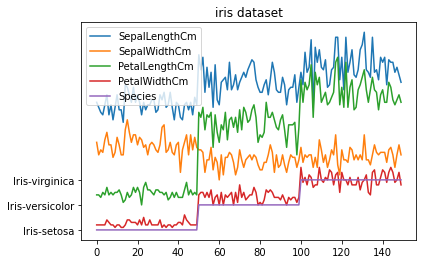

In [53]:
columns=df.columns.drop(['Species'])
columns=df.columns.drop(['Id'])
x_data=range(0,df.shape[0])
fig, ax = plt.subplots()
for column in columns:
    ax.plot(x_data, df[column], label=column)
ax.set_title('iris dataset')
ax.legend()

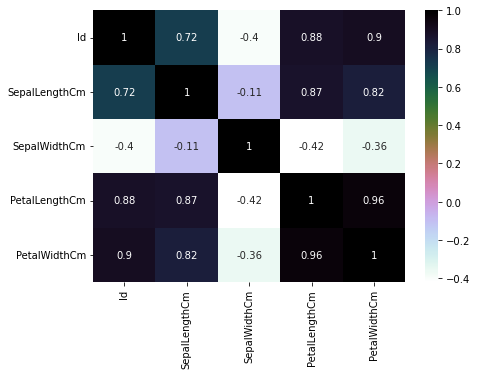

In [33]:
plt.figure(figsize=(7,5))
sns.heatmap(df.corr(), annot=True, cmap='cubehelix_r')
plt.show()

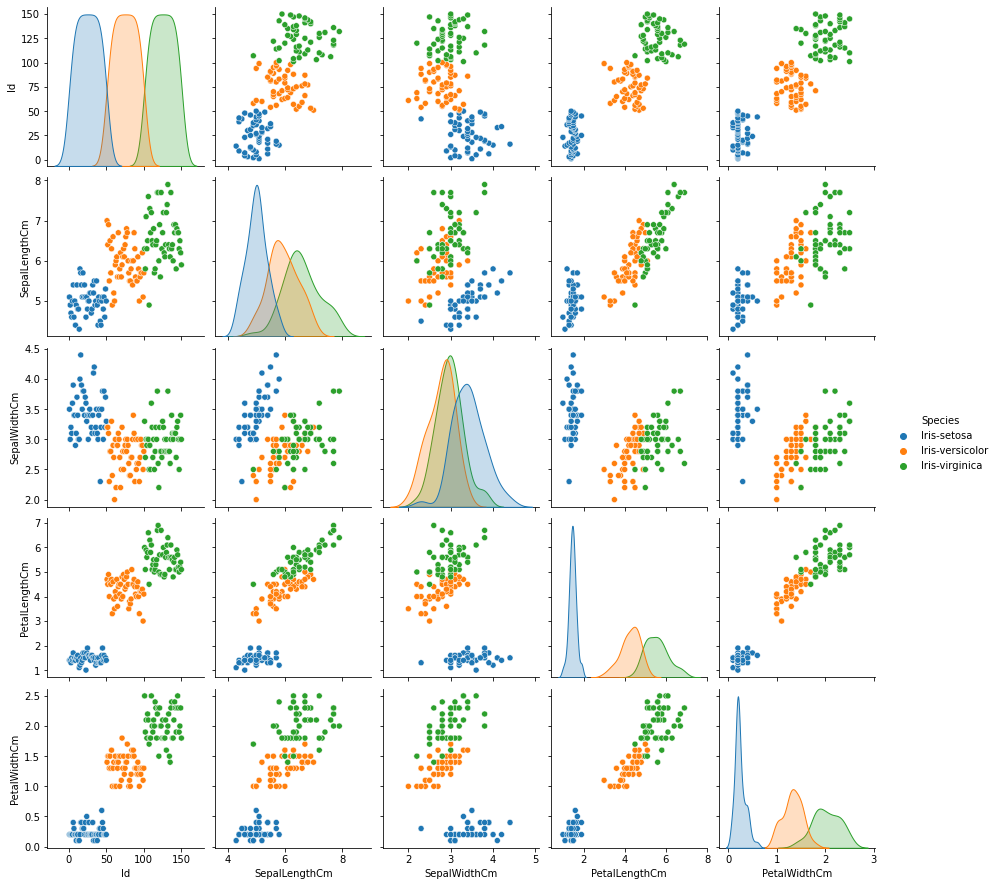

In [65]:
sns.pairplot(df,hue='Species')

In [66]:
features_cols=['SepalLengthCm', 'SepalWidthCm','PetalLengthCm','PetalWidthCm']
X=df[features_cols]
X

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


In [23]:
Y=df.Species
Y

0         Iris-setosa
1         Iris-setosa
2         Iris-setosa
3         Iris-setosa
4         Iris-setosa
            ...      
145    Iris-virginica
146    Iris-virginica
147    Iris-virginica
148    Iris-virginica
149    Iris-virginica
Name: Species, Length: 150, dtype: object

In [24]:
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.2)
print(X_train.shape)
print(X_test.shape)

(120, 4)
(30, 4)


In [27]:
from sklearn.tree import DecisionTreeClassifier

In [38]:
classifier=DecisionTreeClassifier(criterion='gini')

In [39]:
classifier.fit(X_train, Y_train)

DecisionTreeClassifier()

In [40]:
pred=classifier.predict(X_test)
df=pd.DataFrame({'Actual': Y_test, 'Prediction': pred})
df.head()

,Actual,Prediction
1,Iris-setosa,Iris-setosa
114,Iris-virginica,Iris-virginica
70,Iris-versicolor,Iris-virginica
115,Iris-virginica,Iris-virginica
36,Iris-setosa,Iris-setosa


In [41]:
X_test

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
1,4.9,3.0,1.4,0.2
114,5.8,2.8,5.1,2.4
70,5.9,3.2,4.8,1.8
115,6.4,3.2,5.3,2.3
36,5.5,3.5,1.3,0.2
9,4.9,3.1,1.5,0.1
143,6.8,3.2,5.9,2.3
62,6.0,2.2,4.0,1.0
60,5.0,2.0,3.5,1.0
110,6.5,3.2,5.1,2.0


In [50]:
Y_test

1          Iris-setosa
114     Iris-virginica
70     Iris-versicolor
115     Iris-virginica
36         Iris-setosa
9          Iris-setosa
143     Iris-virginica
62     Iris-versicolor
60     Iris-versicolor
110     Iris-virginica
98     Iris-versicolor
15         Iris-setosa
42         Iris-setosa
8          Iris-setosa
16         Iris-setosa
68     Iris-versicolor
124     Iris-virginica
7          Iris-setosa
135     Iris-virginica
86     Iris-versicolor
88     Iris-versicolor
51     Iris-versicolor
89     Iris-versicolor
32         Iris-setosa
61     Iris-versicolor
24         Iris-setosa
104     Iris-virginica
29         Iris-setosa
55     Iris-versicolor
34         Iris-setosa
Name: Species, dtype: object

In [49]:
classifier.score(X_test,Y_test)

0.9666666666666667

In [48]:
from sklearn import tree
#cols=['SepalLengthCm',' SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm']
#target=['setosa', 'versicolor', 'virginica']

[Text(0.4444444444444444, 0.9166666666666666, 'X[3] <= 0.8\ngini = 0.666\nsamples = 120\nvalue = [38, 39, 43]'),
 Text(0.3333333333333333, 0.75, 'gini = 0.0\nsamples = 38\nvalue = [38, 0, 0]'),
 Text(0.5555555555555556, 0.75, 'X[3] <= 1.75\ngini = 0.499\nsamples = 82\nvalue = [0, 39, 43]'),
 Text(0.4444444444444444, 0.5833333333333334, 'X[2] <= 4.95\ngini = 0.201\nsamples = 44\nvalue = [0, 39, 5]'),
 Text(0.2222222222222222, 0.4166666666666667, 'X[3] <= 1.65\ngini = 0.051\nsamples = 38\nvalue = [0, 37, 1]'),
 Text(0.1111111111111111, 0.25, 'gini = 0.0\nsamples = 37\nvalue = [0, 37, 0]'),
 Text(0.3333333333333333, 0.25, 'gini = 0.0\nsamples = 1\nvalue = [0, 0, 1]'),
 Text(0.6666666666666666, 0.4166666666666667, 'X[3] <= 1.55\ngini = 0.444\nsamples = 6\nvalue = [0, 2, 4]'),
 Text(0.5555555555555556, 0.25, 'gini = 0.0\nsamples = 3\nvalue = [0, 0, 3]'),
 Text(0.7777777777777778, 0.25, 'X[0] <= 6.95\ngini = 0.444\nsamples = 3\nvalue = [0, 2, 1]'),
 Text(0.6666666666666666, 0.083333333333333

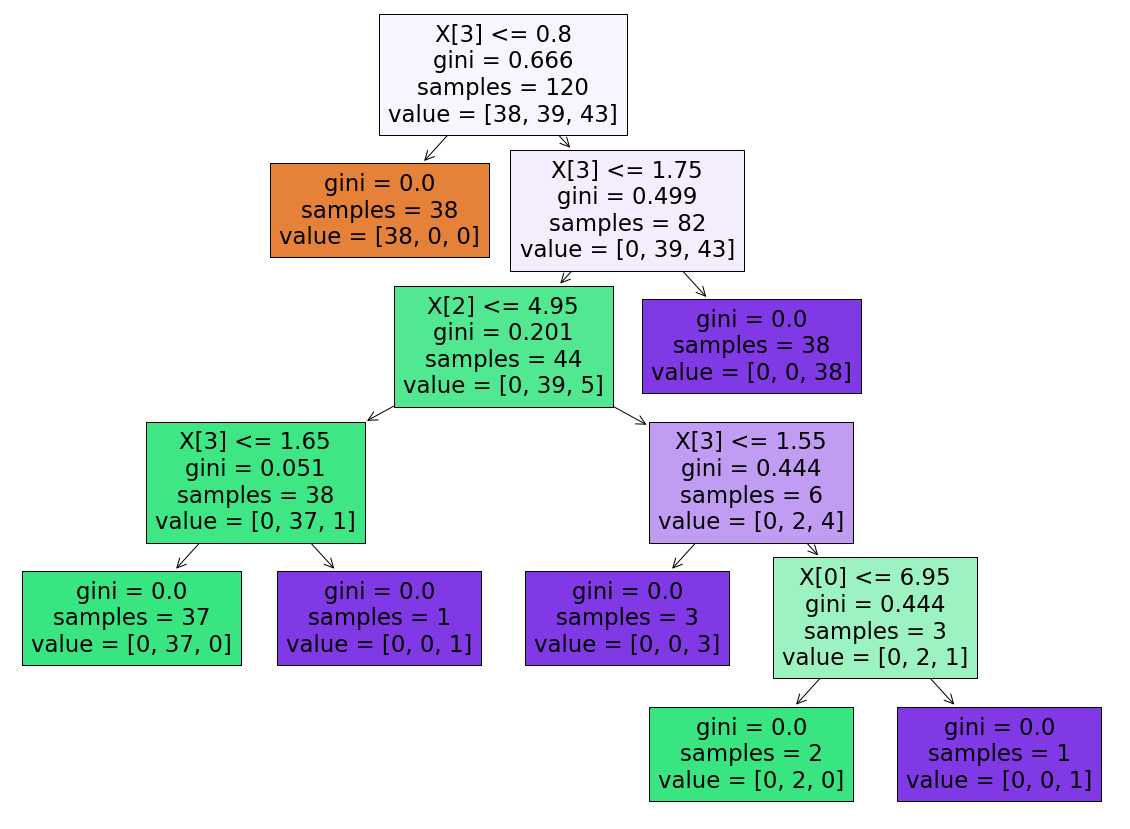

In [53]:
plt.figure(figsize=(20,15))
tree.plot_tree(classifier,filled=True)